## Step 1: Import Necessary Modules

In [1]:
import os
import sys
import inspect
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision import datasets

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, os.path.join(parentdir, 'scripts'))
sys.path.insert(0, os.path.join(parentdir, 'models'))

import models as m
import helpers
%matplotlib inline

## Step 2: Load and Prepare Data

In [2]:
image_transforms = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=image_transforms)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=image_transforms)

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0)

In [3]:
model = m.ConvAutoencoder()
model

ConvAutoencoder(
  (conv_1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling_func): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (trans_conv_1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (trans_conv_2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)

In [4]:
helpers.train_throughput_autoencoder(model, train_loader, epochs=15);

  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

Training on cuda:0


  2%|█▌                                                                             | 36/1875 [00:00<00:10, 169.56it/s]

epoch: 1 Loss: 0.041490


  1%|▋                                                                              | 17/1875 [00:00<00:11, 162.73it/s]

epoch: 2 Loss: 0.018062


  2%|█▍                                                                             | 34/1875 [00:00<00:10, 168.75it/s]

epoch: 3 Loss: 0.014839


  1%|▋                                                                              | 16/1875 [00:00<00:11, 158.42it/s]

epoch: 4 Loss: 0.013714


  1%|▋                                                                              | 16/1875 [00:00<00:11, 159.08it/s]

epoch: 5 Loss: 0.013178


  1%|▊                                                                              | 18/1875 [00:00<00:10, 176.53it/s]

epoch: 6 Loss: 0.012829


  2%|█▌                                                                             | 36/1875 [00:00<00:10, 177.19it/s]

epoch: 7 Loss: 0.012581


  2%|█▌                                                                             | 38/1875 [00:00<00:10, 174.66it/s]

epoch: 8 Loss: 0.012394


  1%|▋                                                                              | 17/1875 [00:00<00:11, 162.84it/s]

epoch: 9 Loss: 0.012249


  2%|█▍                                                                             | 35/1875 [00:00<00:10, 169.83it/s]

epoch: 10 Loss: 0.012130


  1%|▊                                                                              | 19/1875 [00:00<00:10, 182.61it/s]

epoch: 11 Loss: 0.012030


  1%|▊                                                                              | 19/1875 [00:00<00:10, 183.06it/s]

epoch: 12 Loss: 0.011947


  1%|▋                                                                              | 16/1875 [00:00<00:12, 145.95it/s]

epoch: 13 Loss: 0.011879


  1%|▋                                                                              | 17/1875 [00:00<00:10, 169.67it/s]

epoch: 14 Loss: 0.011820


100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 174.69it/s]

epoch: 15 Loss: 0.011767


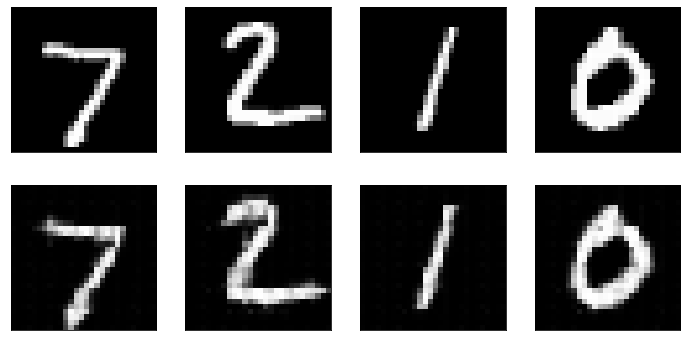

In [5]:
helpers.visualize_inputs_outputs(model, test_loader)
plt.show()